In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

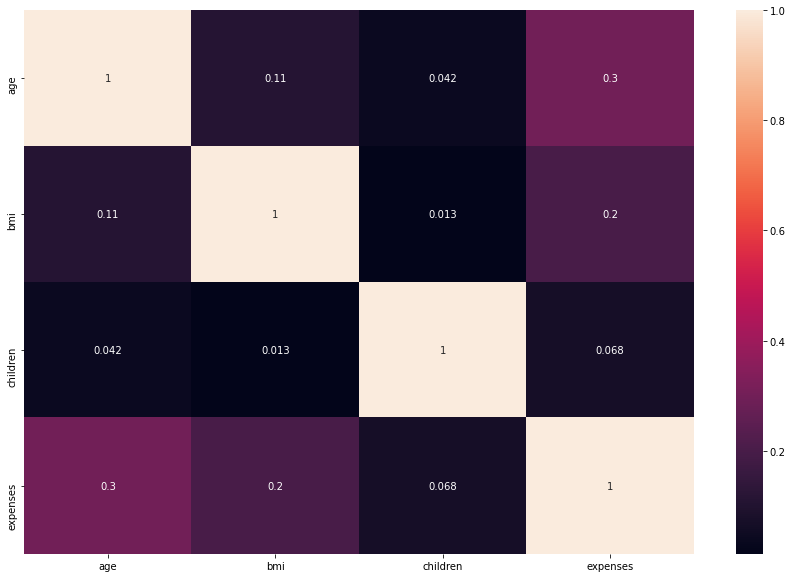

In [7]:
fig, ax=plt.subplots(figsize=(15,10))

corr=df.corr()
sns.heatmap(corr, annot=True,ax=ax)

In [8]:

from sklearn.preprocessing import OneHotEncoder

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [10]:
df['age'].dtype

dtype('int64')

In [11]:
onehotencoder = OneHotEncoder()

In [12]:

part = onehotencoder.fit_transform(df['region'].values.reshape(-1,1)).toarray()

values = dict(df["region"].value_counts())

for e , (val , _) in enumerate(values.items()):
    df["region_" + str(val)] = part[:,e]

df = df.drop(["region"] , axis = 1)



df.head()

,age,sex,bmi,children,smoker,expenses,region_southeast,region_southwest,region_northwest,region_northeast
0,19,female,27.9,0,yes,16884.92,0.0,0.0,0.0,1.0
1,18,male,33.8,1,no,1725.55,0.0,0.0,1.0,0.0
2,28,male,33.0,3,no,4449.46,0.0,0.0,1.0,0.0
3,33,male,22.7,0,no,21984.47,0.0,1.0,0.0,0.0
4,32,male,28.9,0,no,3866.86,0.0,1.0,0.0,0.0


In [13]:
part = onehotencoder.fit_transform(df['sex'].values.reshape(-1,1)).toarray()

values = dict(df["sex"].value_counts())

for e , (val , _) in enumerate(values.items()):
    df["sex_" + str(val)] = part[:,e]

df = df.drop(["sex"] , axis = 1)

df.head()


,age,bmi,children,smoker,expenses,region_southeast,region_southwest,region_northwest,region_northeast,sex_male,sex_female
0,19,27.9,0,yes,16884.92,0.0,0.0,0.0,1.0,1.0,0.0
1,18,33.8,1,no,1725.55,0.0,0.0,1.0,0.0,0.0,1.0
2,28,33.0,3,no,4449.46,0.0,0.0,1.0,0.0,0.0,1.0
3,33,22.7,0,no,21984.47,0.0,1.0,0.0,0.0,0.0,1.0
4,32,28.9,0,no,3866.86,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
part = onehotencoder.fit_transform(df['smoker'].values.reshape(-1,1)).toarray()

values = dict(df["smoker"].value_counts())

for e , (val , _) in enumerate(values.items()):
    df["smoker_" + str(val)] = part[:,e]

df = df.drop(["smoker"] , axis = 1)

In [15]:
df.head()

,age,bmi,children,expenses,region_southeast,region_southwest,region_northwest,region_northeast,sex_male,sex_female,smoker_no,smoker_yes
0,19,27.9,0,16884.92,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,18,33.8,1,1725.55,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,28,33.0,3,4449.46,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,33,22.7,0,21984.47,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,32,28.9,0,3866.86,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [16]:
df.dtypes

age                   int64
bmi                 float64
children              int64
expenses            float64
region_southeast    float64
region_southwest    float64
region_northwest    float64
region_northeast    float64
sex_male            float64
sex_female          float64
smoker_no           float64
smoker_yes          float64
dtype: object

In [17]:
x=df.drop(['expenses'],axis=1)
y=df.iloc[:,-9]
x.shape, y.shape

((1338, 11), (1338,))

In [18]:
y.head(11)

0     16884.92
1      1725.55
2      4449.46
3     21984.47
4      3866.86
5      3756.62
6      8240.59
7      7281.51
8      6406.41
9     28923.14
10     2721.32
Name: expenses, dtype: float64

In [19]:
x.head(11)

,age,bmi,children,region_southeast,region_southwest,region_northwest,region_northeast,sex_male,sex_female,smoker_no,smoker_yes
0,19,27.9,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,18,33.8,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,28,33.0,3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,33,22.7,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,32,28.9,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,31,25.7,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,46,33.4,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,37,27.7,3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,37,29.8,2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,60,25.8,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
x.columns

Index(['age', 'bmi', 'children', 'region_southeast', 'region_southwest',
       'region_northwest', 'region_northeast', 'sex_male', 'sex_female',
       'smoker_no', 'smoker_yes'],
      dtype='object')

In [21]:
x['age'].min

<bound method Series.min of 0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64>

In [22]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest= train_test_split(x,y,test_size=0.2, random_state=4)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
Scaler=StandardScaler()
Xtrain=Scaler.fit_transform(Xtrain)
Xtest=Scaler.transform(Xtest)

In [26]:
Xtrain.shape, Xtest.shape

((1070, 11), (268, 11))

In [27]:
x.shape[1]

11

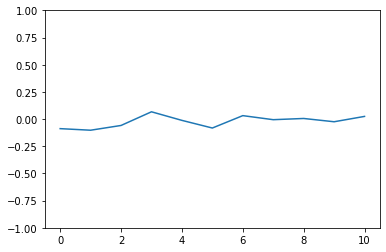

In [28]:
plt.ylim(-1,1)

means=[]
for i in range(x.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means, scaley=False)

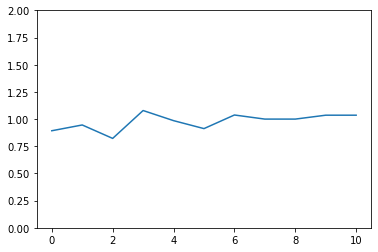

In [29]:
plt.ylim(0,2)

vars=[]
for i in range(x.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars, scaley=False)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

model = LinearRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 11 , n_jobs = -1)
rfecv.fit(Xtrain , Ytrain)

model.fit(Xtrain, Ytrain)

LinearRegression()

In [31]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [32]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
from sklearn import metrics

In [34]:
#USING RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
model1 = RandomForestRegressor()



Training score:0.9781015320938208
Predictions are: [ 6424.3943 12226.9791  8422.8438 12682.4364  6859.2174  1901.6287
 10957.0511 21762.5116 20361.2736 24332.8846  6680.0105 11396.9636
 20740.4534 11454.2051  9542.6434 47476.4536 12641.4191  5639.6057
 27603.9865  1303.7194  8411.8824 40722.1482 11770.6519  7369.1088
  2002.0133 13639.8029 12240.0516  6478.5841 14762.8139  9693.7538
  7705.1974  1299.7857 34260.8202  7218.9498  7129.6503  1303.6738
 16108.5462 13172.5147  5253.8578  6704.0424 12583.8964 43274.4309
  5085.7373 43638.1679 13600.1211  1631.2867 23663.7215 17407.0861
  9750.3407 12679.81    8098.3743  4246.5332 10635.7279  1278.9405
  2716.3914  2296.1726  1720.8658  2454.7348  1805.4039 15892.1076
  8368.9588  5682.2714  4562.6668  9250.596  28796.8722  9536.6002
  7216.0436  6675.7828 12706.5602  6734.3961 11121.5928  6451.0891
  4070.1065 11569.9343 21032.3309 10139.9768  2534.1119 13569.9072
 50169.5841 12253.1387  5488.1523 13888.4311 37622.5288 12009.1563
  1379.7482

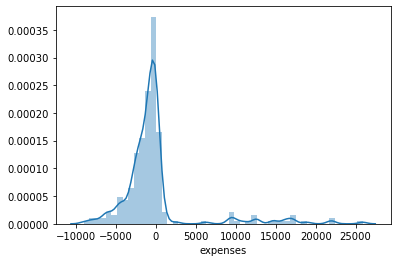

In [37]:
model1.fit(Xtrain,Ytrain)
print ('Training score:{}'.format(model1.fit(Xtrain,Ytrain).score(Xtrain,Ytrain)))
predictions=model1.fit(Xtrain,Ytrain).predict(Xtest)
print('Predictions are: {}'.format(predictions))
print('\n')
r2_score=metrics.r2_score(Ytest,predictions)
print('my r2 score is:{}'.format(r2_score))
    
    
print('My MAE:',metrics.mean_absolute_error(Ytest,predictions))
print('My MSE:',metrics.mean_squared_error(Ytest,predictions))
print('My RMAE:',np.sqrt(metrics.mean_absolute_error(Ytest,predictions)))
sns.distplot(Ytest-predictions)

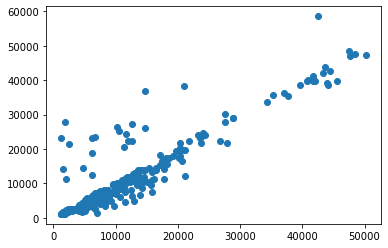

In [38]:
plt.scatter(predictions,Ytest)

In [39]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_loan_predict_model.pkl', 'wb')

# dump information to that file
pickle.dump(model1, file)
file.close()